# Get number of sputtered and injected atoms from etch.dat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path2target = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/0deg_500eV"

In [3]:
from mlptools.analyzer.sputtering_yield import SputteringYieldCalculator

syc = SputteringYieldCalculator(path2target)
sp_df = syc.get_n_sputtered_atoms_with_timestep(target_atom_type=[1])
sp_with_ion_dose = syc.get_sputtering_yield_with_ion_dose(area=4.0725**2, num_injection=15, target_atom_type=[1])

Number of total timestep: 20000000
Inject atom every 20000 timestep
Number of injected atoms: 1000


# timestepとnum_sputtered_atomの関係をプロット

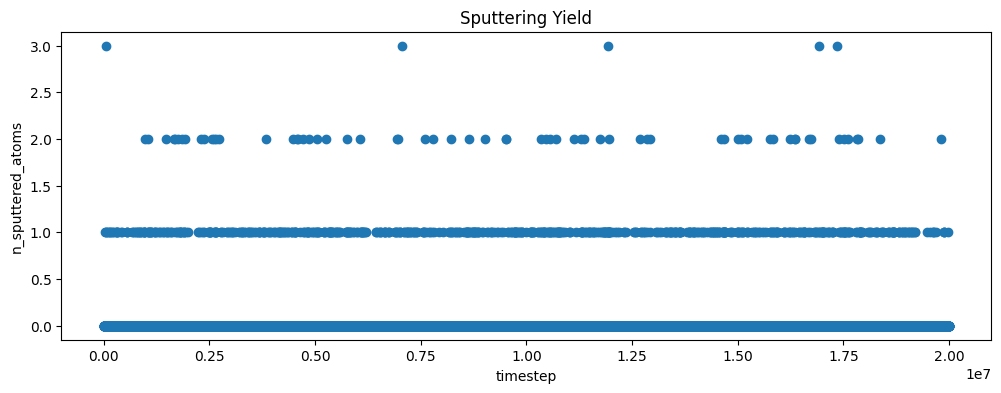

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(sp_df["timestep"], sp_df["num_sputtered_atom"])
ax.set_xlabel("timestep")
ax.set_ylabel("n_sputtered_atoms")
ax.set_title("Sputtering Yield")
plt.show()

In [4]:
sp_df

,timestep,num_sputtered_atom
0,1000,0
1,2000,0
2,3000,0
3,4000,0
4,5000,0
...,...,...
20995,19997000,0
20996,19998000,0
20997,19999000,0
20998,20000000,0


803

In [5]:
num_injected_sputtered_atoms_df = syc.get_injected_and_sputtered_atoms(target_atom_type=[1])

Sum up timestep interval: (0, 20000)
Number of injected atoms: 1, sputtered atoms: 0
Sum up timestep interval: (20000, 40000)
Number of injected atoms: 2, sputtered atoms: 0
Sum up timestep interval: (40000, 60000)
Number of injected atoms: 3, sputtered atoms: 2
Sum up timestep interval: (60000, 80000)
Number of injected atoms: 4, sputtered atoms: 4
Sum up timestep interval: (80000, 100000)
Number of injected atoms: 5, sputtered atoms: 0
Sum up timestep interval: (100000, 120000)
Number of injected atoms: 6, sputtered atoms: 2
Sum up timestep interval: (120000, 140000)
Number of injected atoms: 7, sputtered atoms: 0
Sum up timestep interval: (140000, 160000)
Number of injected atoms: 8, sputtered atoms: 2
Sum up timestep interval: (160000, 180000)
Number of injected atoms: 9, sputtered atoms: 0
Sum up timestep interval: (180000, 200000)
Number of injected atoms: 10, sputtered atoms: 1
Sum up timestep interval: (200000, 220000)
Number of injected atoms: 11, sputtered atoms: 0
Sum up tim

(array([498.,   0., 278.,   0., 153.,   0.,  43.,   0.,  22.,   6.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

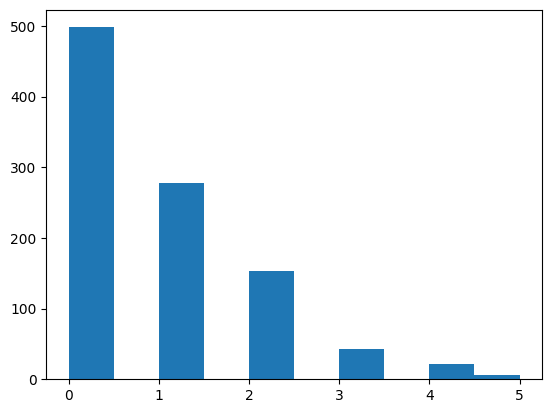

In [6]:
plt.hist(num_injected_sputtered_atoms_df["num_sputtered_atoms"], bins=10)